In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/creditcard.csv')

# Remove rows with NaN values in the target variable
df = df.dropna(subset=['Class'])

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models
log_reg = LogisticRegression(random_state=42)
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_naive_bayes = naive_bayes.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Naive Bayes Accuracy: {accuracy_naive_bayes}")
print(f"Random Forest Accuracy: {accuracy_random_forest}")


Logistic Regression Accuracy: 0.9984801448712973
Naive Bayes Accuracy: 0.9762967274608718
Random Forest Accuracy: 0.9995796145388695


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Voting Classifier (Logistic Regression + Naive Bayes) Accuracy: 0.9847704110843926
Voting Classifier (Logistic Regression + Random Forest) Accuracy: 0.9995419672506585
Voting Classifier (Naive Bayes + Random Forest) Accuracy: 0.9955341806939196


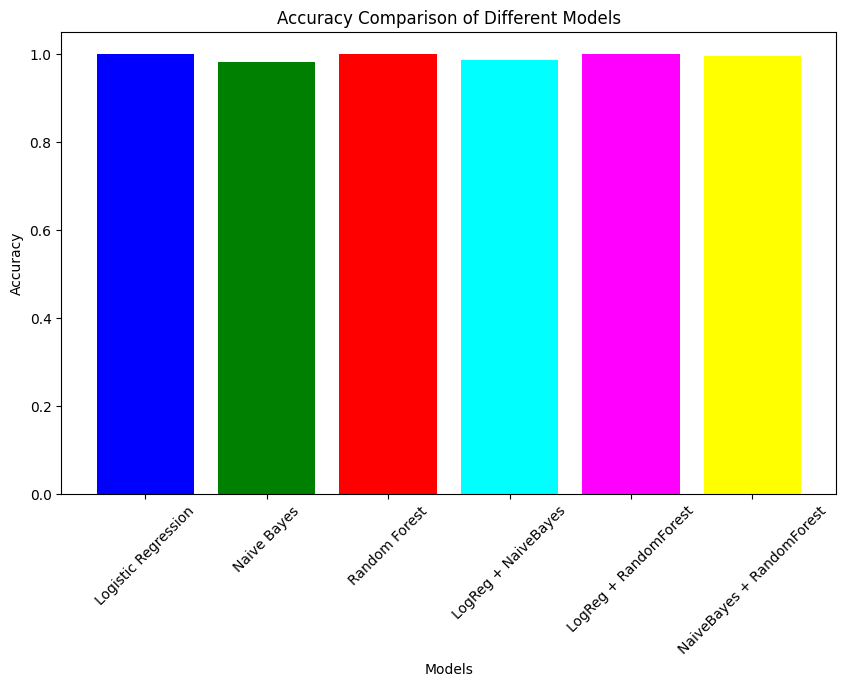

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier combining Logistic Regression and Naive Bayes
voting_clf1 = VotingClassifier(estimators=[
    ('log_reg', log_reg), ('naive_bayes', naive_bayes)], voting='soft')

# Create a Voting Classifier combining Logistic Regression and Random Forest
voting_clf2 = VotingClassifier(estimators=[
    ('log_reg', log_reg), ('random_forest', random_forest)], voting='soft')

# Create a Voting Classifier combining Naive Bayes and Random Forest
voting_clf3 = VotingClassifier(estimators=[
    ('naive_bayes', naive_bayes), ('random_forest', random_forest)], voting='soft')

# Train the Voting Classifiers
voting_clf1.fit(X_train, y_train)
voting_clf2.fit(X_train, y_train)
voting_clf3.fit(X_train, y_train)

# Make predictions
y_pred_voting_clf1 = voting_clf1.predict(X_test)
y_pred_voting_clf2 = voting_clf2.predict(X_test)
y_pred_voting_clf3 = voting_clf3.predict(X_test)

# Calculate accuracy
accuracy_voting_clf1 = accuracy_score(y_test, y_pred_voting_clf1)
accuracy_voting_clf2 = accuracy_score(y_test, y_pred_voting_clf2)
accuracy_voting_clf3 = accuracy_score(y_test, y_pred_voting_clf3)

print(f"Voting Classifier (Logistic Regression + Naive Bayes) Accuracy: {accuracy_voting_clf1}")
print(f"Voting Classifier (Logistic Regression + Random Forest) Accuracy: {accuracy_voting_clf2}")
print(f"Voting Classifier (Naive Bayes + Random Forest) Accuracy: {accuracy_voting_clf3}")

# Visualize the accuracies
import matplotlib.pyplot as plt

accuracies = [
    accuracy_log_reg,
    accuracy_naive_bayes,
    accuracy_random_forest,
    accuracy_voting_clf1,
    accuracy_voting_clf2,
    accuracy_voting_clf3
]

labels = [
    'Logistic Regression',
    'Naive Bayes',
    'Random Forest',
    'LogReg + NaiveBayes',
    'LogReg + RandomForest',
    'NaiveBayes + RandomForest'
]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model with parallel computing
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Train the random forest model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = random_forest.predict(X_test)

# Calculate accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy with Parallel Computing: {accuracy_random_forest}")


Random Forest Accuracy with Parallel Computing: 0.9997709836253292


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Convert data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Configure distributed strategy
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with distributed strategy
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Distributed Training Accuracy: {accuracy}")


Epoch 1/10
1092/1092 [==============================] - 7s 5ms/step - loss: 0.0278 - accuracy: 0.9927 - val_loss: 0.0060 - val_accuracy: 0.9985
Epoch 2/10
1092/1092 [==============================] - 4s 4ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0050 - val_accuracy: 0.9984
Epoch 3/10
1092/1092 [==============================] - 6s 5ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9984
Epoch 4/10
1092/1092 [==============================] - 4s 4ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0036 - val_accuracy: 0.9984
Epoch 5/10
1092/1092 [==============================] - 4s 4ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0038 - val_accuracy: 0.9983
Epoch 6/10
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0032 - val_accuracy: 0.9986
Epoch 7/10
1092/1092 [==============================] - 4s 4ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0043 - val_accuracy: